<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/goldbach1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as scp
import scipy.optimize as opt

ps = np.array([i for i in sympy.sieve.primerange(3, 10**6)])
print(ps)

import mpmath
print(mpmath.li(100))

%matplotlib inline

[     3      5      7 ... 999961 999979 999983]
30.1261415840796


### Using stronger inequalities in Wikipedia's Erdos' proof of Bertrand's postulate

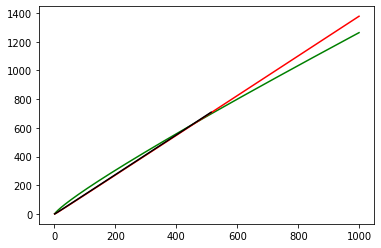

467.37315615971846


In [ ]:
def upper_bound(n):
  tn = 2*n
  sq = np.sqrt(tn)
  lg = np.log(sq)

  # weak condition from Wikipedia
  return sq*np.log(tn)+(tn/3.)*np.log(4)

  # pi(x) < condition for any x > 1
  # return (sq/lg)*(1+1/lg+2/lg**2+7.59/lg**3)*np.log(tn)+(2*n/3.)*(1+0.5/np.log(2*n/3.))

  # pi(x) < condition for x > 17
  # return (sq/lg)*1.26*np.log(tn)+(2*n/3.)*(1+0.5/np.log(2*n/3.))

#for n in np.arange(3,1000):
  #print("{}: log(2n n) < {}".format(n,upper_bound(n)))

def lower_bound(n):

  # weak condition from Wikipedia
  return n*np.log(4) - np.log(2*n)

  # strong inequality Stirling approx.
  # return n*np.log(4) - 0.5*np.log(np.pi*n)- (18*n+1)/(6*n*(24*n+1))

xi, xf = 1,1000  
plt.plot(np.arange(xi,xf), [upper_bound(n) for n in np.arange(xi,xf)], 'g-')
plt.plot(np.arange(xi,xf), [lower_bound(n) for n in np.arange(xi,xf)], 'r-')
plt.plot(np.arange(xi,xf), [np.log(scp.binom(2*n,n)) for n in np.arange(xi,xf)], 'k-')
plt.show()

def diff_bound(n):
    return upper_bound(n) - lower_bound(n)

print("{}".format(opt.brentq(diff_bound, xi, xf)))

### Assuming all primes < n are the largest numbers and are multiplied in log(2n n):

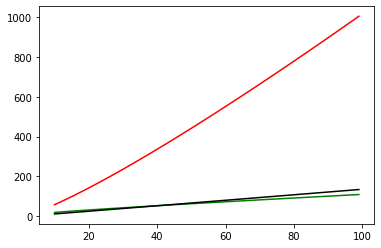

In [ ]:
def upper_bound(n):
  tn = 2*n
  sq = np.sqrt(tn)
  lg = np.log(sq)

  # weak condition from Wikipedia
  # return sq*np.log(tn)+(tn/3.)*np.log(4)

  # pi(x) < condition for any x > 1
  # return (sq/lg)*(1+1/lg+2/lg**2+7.59/lg**3)*np.log(tn)+(2*n/3.)*(1+0.5/np.log(2*n/3.))

  # pi(x) < condition for x > 17
  return (sq/lg)*1.26*np.log(tn)+(2*n/3.)*(1+0.5/np.log(2*n/3.))

def lower_bound(n):
  tn = 2*n
  lg1 = np.log(n)
  lg2 = np.log(tn)

  return np.log(np.sqrt(2*np.pi)/np.e) + (tn+0.5)*lg2 - (n/lg1 +0.5)*np.log(n/lg1)+n/lg1

xi, xf = 10,100 #0  
plt.plot(np.arange(xi,xf), [upper_bound(n) for n in np.arange(xi,xf)], 'g-')
plt.plot(np.arange(xi,xf), [lower_bound(n) for n in np.arange(xi,xf)], 'r-')
plt.plot(np.arange(xi,xf), [np.log(scp.binom(2*n,n)) for n in np.arange(xi,xf)], 'k-')
plt.show()

def diff_bound(n):
    return upper_bound(n) - lower_bound(n)

#print("{}".format(opt.brentq(diff_bound, xi, xf)))

Just checking sympy library to find nearby primes...

In [ ]:
maxd = 0
for n in range(6,10000005,2):
  h = n//2
  if not sympy.isprime(h):
    l, u = sympy.prevprime(h), sympy.nextprime(h)
    d = min(h-l,u-h)
  else:
    l, u, d = h, h, 0
  if maxd < d:
    maxd = d
  #print("{}/2 = {}: prev = {}, next = {}, distance = {}".format(n, h, l, u, d))
  if n == (10 ** (len(str(n))-1)):
    print("n: {} --> max distance: {}".format(n,maxd))

n: 10 --> max distance: 1
n: 100 --> max distance: 3
n: 1000 --> max distance: 7
n: 10000 --> max distance: 17
n: 100000 --> max distance: 36
n: 1000000 --> max distance: 57
n: 10000000 --> max distance: 77


### Just some checks to inspire for (2n-p1)...(2n-pk)

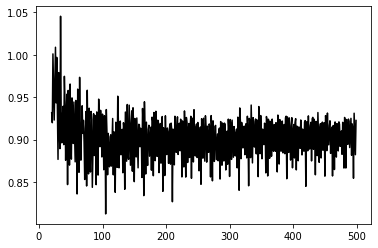

0.9042884401455514


In [ ]:
def constraint(n):
  global ps
  lps = ps[:np.argmax(ps>n)] #np.array([i for i in sympy.sieve.primerange(3, n)])
  ts = 2*n - lps
  #prod = np.prod(ts)
  psum = np.sum(np.log(ts))
  #print("{}, {} --> {}, {}".format(ps,ts,prod,psum))
  return psum
#constraint(10)

def logmult_small(n1,n2,n):
  global ps
  lps = ps[np.argmax(ps>n1):np.argmax(ps>n2)]
  if n1 <= 1:
    lps = np.union1d(lps,[2])
  tot = 0
  for p in lps:
    J = int(np.floor(np.log(2*n)/np.log(p)))
    R = 0
    for j in range(1,J):
      R += np.floor(2*n/p**j)-2*np.floor(n/p**j)
    tot += R*np.log(p)
  return tot

def upper_bound(n):
  tn = 2*n
  sq = np.sqrt(tn)
  lg = np.log(sq)

  # weak condition from Wikipedia
  # return sq*np.log(tn)+(tn/3.)*np.log(4)+scp.gammaln(n)

  # pi(x) < condition for x > 17
  # return (sq/lg)*1.26*np.log(tn)+(2*n/3.)*(1+0.5/np.log(2*n/3.))+scp.gammaln(n)

  # pi(x) > li(x) and exact for primorial #
  global ps
  lps = ps[np.argmax(ps>sq):np.argmax(ps>2*n/3)]
  #return sympy.primepi(sq)*np.log(tn)+np.sum(np.log(lps))+scp.gammaln(n)
  #return sympy.primepi(sq)*np.log(tn)+logmult_small(sq,2*n/3,n)+scp.gammaln(n)
  #return sympy.primepi(sq)*np.log(tn)+np.sum(np.log(lps))+scp.gammaln(n)
  #return (sq/lg)*1.26*np.log(tn)+((2*n/3)*(1+0.5/np.log(2*n/3))+(2*n/5)*(1+0.5/np.log(2*n/5))-(2*n/4.)*(1-0.5/np.log(2*n/4.))-(sq)*(1-0.5/np.log(sq)))+scp.gammaln(n)
  # return (sq/lg)*1.26*np.log(tn)+0.5*n-(sq)*(1-0.5/np.log(sq))+scp.gammaln(n)
  # return (sq/lg)*1.26*np.log(tn)+logmult_small(sq,2*n/3,n)+scp.gammaln(n)
  return (sq/lg)*1.26*np.log(tn)+logmult_small(1,2*n/3,n)+(n+0.5)*np.log(n) - (n-1) #stirling approx.

def myavg(n):
  global ps
  lps = ps[:np.argmax(ps>n)]#np.array([i for i in sympy.sieve.primerange(3, n)])
  lp = len(lps)
  pavg = np.sum(lps)/lp
  return lp*np.log(2*n - pavg)

def approx_avg(n):
  return (n/np.log(n))*np.log(1.5*n)

def logmult_other(n):
  global ps
  lps = ps[:np.argmax(ps>n)]#np.array([i for i in sympy.sieve.primerange(3, n)])
  ts = 2*n - lps
  nps = ps[np.argmax(ps>n):np.argmax(ps>2*n)]#np.array([i for i in sympy.sieve.primerange(n+1, 2*n)])
  unps = np.union1d(ts,nps)
  xs = np.array(np.setdiff1d(range(n+1,2*n+1,1),unps))
  #print("{} -> {}, {} --> {}".format(ps,ts,nps,unps))
  #print("diff: {}".format(xs))
  return np.sum(np.log(xs))
#logmult_other(50)

xi, xf = 20,500 #10**4 #10**4,2*10**4 #0  
fn = [upper_bound(n)/(logmult_other(n)+constraint(n)) for n in np.arange(xi,xf)]
#plt.plot(np.arange(xi,xf), [constraint(n)/myavg(n) for n in np.arange(xi,xf)], 'k-')
#plt.plot(np.arange(xi,xf), [upper_bound(n) for n in np.arange(xi,xf)], 'r-')
#plt.plot(np.arange(xi,xf), [constraint(n)/approx_avg(n) for n in np.arange(xi,xf)], 'b-')
#plt.plot(np.arange(xi,xf), [constraint(n) for n in np.arange(xi,xf)], 'k-')
#plt.plot(np.arange(xi,xf), [logmult_other(n)+constraint(n) for n in np.arange(xi,xf)], 'k-')
#plt.plot(np.arange(xi,xf), [upper_bound(n) for n in np.arange(xi,xf)], 'r-')
#plt.plot(np.arange(xi,xf), [upper_bound(n)/constraint(n) for n in np.arange(xi,xf)], 'b-')
plt.plot(np.arange(xi,xf), fn, 'k-')
#plt.plot(np.arange(xi,xf), [upper_bound(n)/logmult_other(n) for n in np.arange(xi,xf)], 'g-')
plt.show()

print(np.mean(np.array(fn)))


### Approximation of polynomials by their roots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


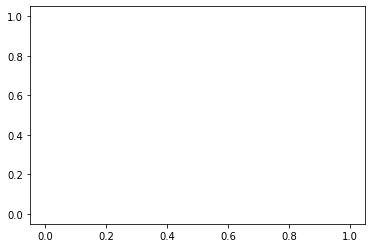

In [ ]:
def pol(x, r):
  return np.sum(np.log(x - r))

def polavg(x, r):
  a = np.mean(r)
  return len(r)*np.log(x - a)

def poln(x,r):
  return len(r)*np.log(x)

def poln2(x,r):
  s = np.sum(r)
  n = len(r)
  return (n-1)*np.log(x)+np.log(x-s)

#r = np.array([0,1,2,3,4,5,6,7,8,9])
r = np.random.randint(low = 0, high = 1000, size = 200) 
#r = np.array(range(0,1000))
#print(r)
xi, xf = 3000,5000 #10**4 #10**4,2*10**4 #0  
dx = np.arange(xi,xf)
px = np.array([pol(x,r) for x in dx])
apx = np.array([polavg(x,r) for x in dx])
pxn = np.array([poln(x,r) for x in dx])
pxn2 = np.array([poln2(x,r) for x in dx])
#plt.plot(dx, px, 'k-')
#plt.plot(dx, apx, 'b.')
#plt.plot(dx, pxn, 'g-')
plt.plot(dx, pxn2, 'r-')
plt.show()
#print(px/apx)

In [ ]:

#np.union1d(np.array([1,2,3,5]),np.array([2,4]))
np.union1d(ps[:np.argmax(ps>38)],[2])

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37])